# PHY205: General Physics for the Life Sciences I

## Tucker Knaak - Department of Physics, Creighton University - Spring 2023

### Lab 8: Diffusion and Brownian Motion

#### In this lab, students are expected to:
##### 1. Observe Brownian motion of small particles and estimate the diffusion distance and the diffusion coefficient for the suspended particles
##### 2. Calculate the diffusion coefficient from histograms of diffusion distances measured at various times
##### 3. Use measured diffusion properties to estimate transport distances by diffusion

In [1]:
'''Required Libraries'''
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

#### Part 2: The Drunkard's Random Walk.

##### In statistics, the accumulation of many small random events can lead to a pattern of variations in a series of measurements that is “normally distributed” and thus has a histogram that looks like a bell-shaped curve. To do this we are going to consider a series of measurements on the locations of drunkards in an alley. If the drunkards leave a bar in the center of the alley and then make small steps at random, where will we find them sleeping in the morning? Assume that during each second of time that passes a drunk has an equal probability of staggering to the right, standing still, or staggering to the left.

In [2]:
class Part2():
    
    '''Internal function to initialize the system'''
    def __init__(self):
        
        self.paths = []   #list of the path taken during for each random walk
        self.pos_5 = []   #list of the positions after 5 steps for each random walk
        self.pos_10 = []  #list of the positions after 10 steps for each random walk
        self.pos_15 = []  #list of the positions after 15 steps for each random walk
        self.pos_20 = []  #list of the positions after 20 steps for each random walk
        
        
    '''Internal function to conduct a random walk with 20 steps'''  
    def random_walk(self):
        
        '''Set initial positition'''
        position = 0
        path = [0]
        
        '''Random walk with 20 steps'''
        for step in range(1, 21):
            
            '''Choose random integer in [1, 6]'''
            rnd = np.random.randint(1, 7, size = 1)
            
            '''Move left // stay still // move right'''
            if rnd == 1 or rnd == 2:
                position -= 1
            elif rnd == 3 or rnd == 4:
                pass
            else:
                position += 1
            
            '''Append position at each step'''
            path.append(position)
            
            '''Append positions at 5 // 10 // 15 // 20 steps'''
            if step == 5:
                self.pos_5.append(position)
            elif step == 10:
                self.pos_10.append(position)
            elif step == 15:
                self.pos_15.append(position)
            elif step == 20:
                self.pos_20.append(position)
        
        '''Append path'''
        self.paths.append(path)
        
        
    '''Function called by user to plot histograms of the random walks'''
    def histogram(self, num_trials: int, save_fig = False):
        
        '''Conduct random walks'''
        for trial in range(num_trials):
            self.random_walk()
            
        '''Set colors for plots'''
        hist_color = plt.cm.viridis(np.linspace(0, 0.8, 4))
            
        '''Create figure and plot results'''
        fig = plt.figure(figsize = (12, 12))
        fig.tight_layout(pad = 3)
        gs = gridspec.GridSpec(3, 4)
        gs.update(hspace = 0.25)
        gs.update(wspace = 0.5)
        
        '''First figure --> position at 5 steps'''
        ax1 = plt.subplot(gs[0, :2])
        ax1.set_xlabel('Position')
        ax1.set_ylabel('Frequency')
        ax1.set_title(f'Position after 5 Steps in Random Walk for {num_trials} Trials')
        ax1.set_xlim(-20, 20)
        ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax1.hist(self.pos_5, bins = np.arange(-5.5, 6.5, 1), color = hist_color[0], edgecolor = 'black', rwidth = 0.75)
        
        '''Second figure --> position at 10 steps'''
        ax2 = plt.subplot(gs[0, 2:])
        ax2.set_xlabel('Position')
        ax2.set_ylabel('Frequency')
        ax2.set_title(f'Position after 10 Steps in Random Walk for {num_trials} Trials')
        ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax2.set_xlim(-20, 20)
        ax2.hist(self.pos_10, bins = np.arange(-10.5, 11.5, 1), color = hist_color[1], edgecolor = 'black', rwidth = 0.75)
        
        '''Third figure --> position at 15 steps'''
        ax3 = plt.subplot(gs[1, :2])
        ax3.set_xlabel('Position')
        ax3.set_ylabel('Frequency')
        ax3.set_title(f'Position after 15 Steps in Random Walk for {num_trials} Trials')
        ax3.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax3.set_xlim(-20, 20)
        ax3.hist(self.pos_15, bins = np.arange(-15.5, 16.5, 1), color = hist_color[2], edgecolor = 'black', rwidth = 0.75)
        
        '''Fourth figure --> position at 20 steps'''
        ax4 = plt.subplot(gs[1, 2:])
        ax4.set_xlabel('Position')
        ax4.set_ylabel('Frequency')
        ax4.set_title(f'Position after 20 Steps in Random Walk for {num_trials} Trials')
        ax4.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        ax4.set_xlim(-20, 20)
        ax4.hist(self.pos_20, bins = np.arange(-20.5, 21.5, 1), color = hist_color[3], edgecolor = 'black', rwidth = 0.75)
        
        '''Fifth figure --> plot of paths'''
        steps = [step for step in range(21)]
        ax5 = plt.subplot(gs[2, 1:3])
        ax5.set_xlabel('Steps')
        ax5.set_ylabel('Position')
        ax5.set_title('10 Randomly Chosen Paths of Random Walks')
        ax5.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.25)
        for trial in np.random.randint(0, num_trials, size = 10, dtype = int):
            walk_color = plt.cm.viridis(np.random.uniform(0, 0.8))
            ax5.plot(steps, self.paths[trial], linestyle = 'solid', color = walk_color)
            
        '''Save figure'''
        if save_fig:
            fig.savefig(f'c:/Users/Tucker Knaak/Downloads/20StepRandomWalk_{num_trials}Trials.png')

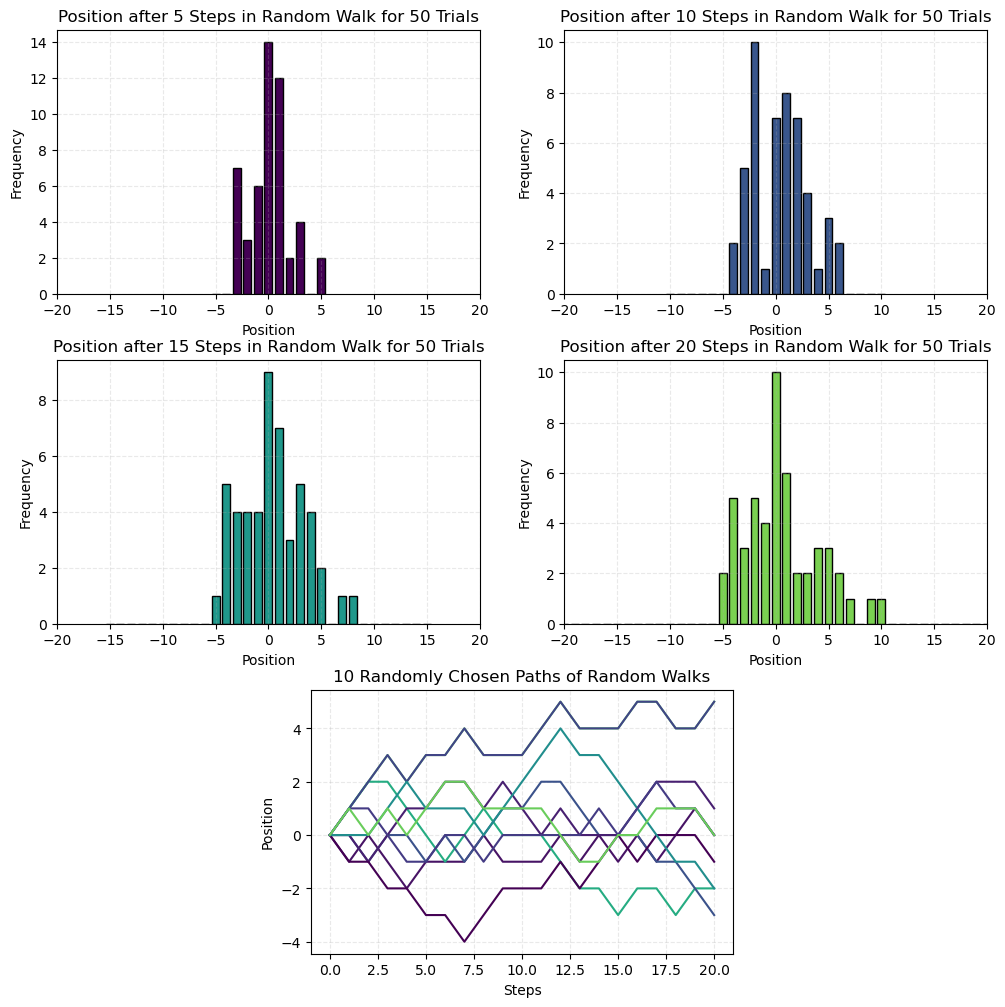

In [3]:
'''Consider 50 trials'''
num_trials = 50

'''Conduct random walks and plot results'''
sys1 = Part2()
sys1.histogram(num_trials, save_fig = True)

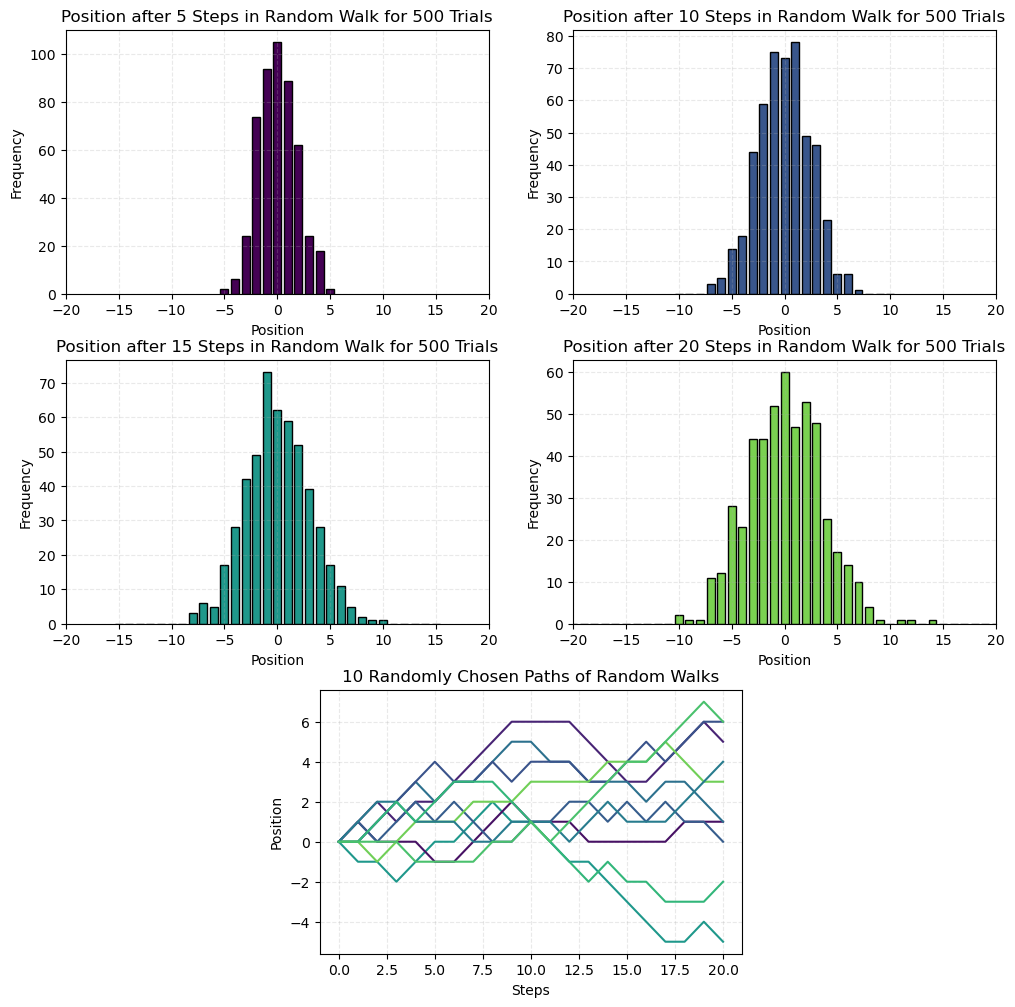

In [4]:
'''Consider 500 trials'''
num_trials = 500

'''Conduct random walks and plot results'''
sys1 = Part2()
sys1.histogram(num_trials, save_fig = True)

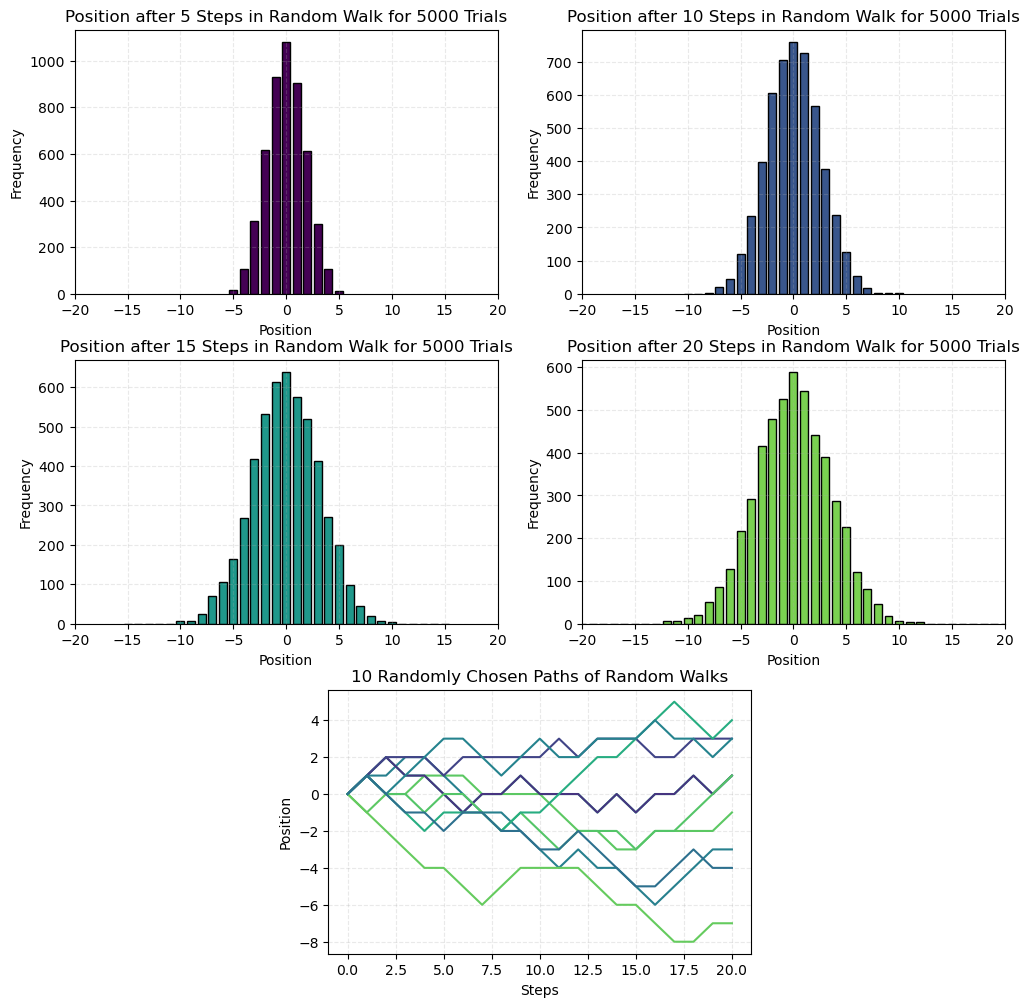

In [5]:
'''Consider 5000 trials'''
num_trials = 5000

'''Conduct random walks and plot results'''
sys1 = Part2()
sys1.histogram(num_trials, save_fig = True)